<a href="https://colab.research.google.com/github/hiroinie/intro_git/blob/main/notebooks/train-yolo11-object-detection-on-custom-dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLO11 Object Detection on a Custom Dataset

---

[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

YOLO11 builds on the advancements introduced in YOLOv9 and YOLOv10 earlier this year, incorporating improved architectural designs, enhanced feature extraction techniques, and optimized training methods.

YOLO11m achieves a higher mean mAP score on the COCO dataset while using 22% fewer parameters than YOLOv8m, making it computationally lighter without sacrificing performance.

YOLOv11 is available in 5 different sizes, ranging from `2.6M` to `56.9M` parameters, and capable of achieving from `39.5` to `54.7` mAP on the COCO dataset.

## Setup

### Configure API keys

To fine-tune YOLO11, you need to provide your Roboflow API key. Follow these steps:

- Go to your [`Roboflow Settings`](https://app.roboflow.com/settings/api) page. Click `Copy`. This will place your private key in the clipboard.
- In Colab, go to the left pane and click on `Secrets` (🔑). Store Roboflow API Key under the name `ROBOFLOW_API_KEY`.

### Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Sun Jun  1 06:55:45 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   35C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLO11 via Ultralytics

In [3]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.6/112.6 GB disk)


### Download Dataset from Roboflow

Use the Roboflow library to download the dataset in YOLOv11 format based on the specified API key, workspace, project, and version. This prepares the images and annotations for training.

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ROBO_POOL_API")
project = rf.workspace("hiro-pwysl").project("swimming-pool-1stbj")
version = project.version(2)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to swimming-pool-2 in yolov11:: 100%|██████████| 555/555 [00:00<00:00, 7638.39it/s]


## Training YOLOv11 on Custom Dataset with CLI

In [6]:
!yolo task=detect mode=train \
      model=yolo11n.pt \
      data=/content/swimming-pool-2/data.yaml \
      epochs=100 imgsz=640 batch=16 \
      name=pool_y11n

New https://pypi.org/project/ultralytics/8.3.146 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/swimming-pool-2/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=pool_y11n, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False

# Evaluation on the trained model:

In [7]:
!yolo task=detect mode=val \
      model=runs/detect/pool_y11n/weights/best.pt \
      data=/content/swimming-pool-2/data.yaml

Ultralytics 8.3.40 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/swimming-pool-2/valid/labels.cache... 83 images, 24 backgrounds, 0 corrupt: 100% 83/83 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 6/6 [00:02<00:00,  2.39it/s]
                   all         83        108      0.914      0.926      0.953       0.78
Speed: 3.5ms preprocess, 10.0ms inference, 0.0ms loss, 4.4ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


# Inference (prediction) for object detection:

In [8]:
!yolo task=detect mode=predict \
      model=runs/detect/pool_y11n/weights/best.pt \
      source=/content/swimming-pool-2/valid/images \
      conf=0.35 \
      save=True

Ultralytics 8.3.40 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

image 1/83 /content/swimming-pool-2/valid/images/100_png.rf.768f7039f1fceb39e51d215e170876ab.jpg: 640x640 2 swimming pools, 12.7ms
image 2/83 /content/swimming-pool-2/valid/images/101_png.rf.08936f10dc0840fa605c687d4b2fda9b.jpg: 640x640 1 swimming pool, 9.0ms
image 3/83 /content/swimming-pool-2/valid/images/102_png.rf.6b0c7a8b2efb5842edd8a90f7c3a7225.jpg: 640x640 (no detections), 8.2ms
image 4/83 /content/swimming-pool-2/valid/images/103_png.rf.fcbd9104e970eebc76b1a4642f5e1fff.jpg: 640x640 (no detections), 9.7ms
image 5/83 /content/swimming-pool-2/valid/images/104_png.rf.ddc66afc5ceebfc5b53877d5a9809809.jpg: 640x640 (no detections), 8.0ms
image 6/83 /content/swimming-pool-2/valid/images/105_png.rf.0322530eb2e08ed3d1b015ba99b6d841.jpg: 640x640 (no detections), 8.1ms
image 7/83 /content/swimming-pool-2/valid/images/106_png.r

# Finally, the code cell that displays a prediction result:

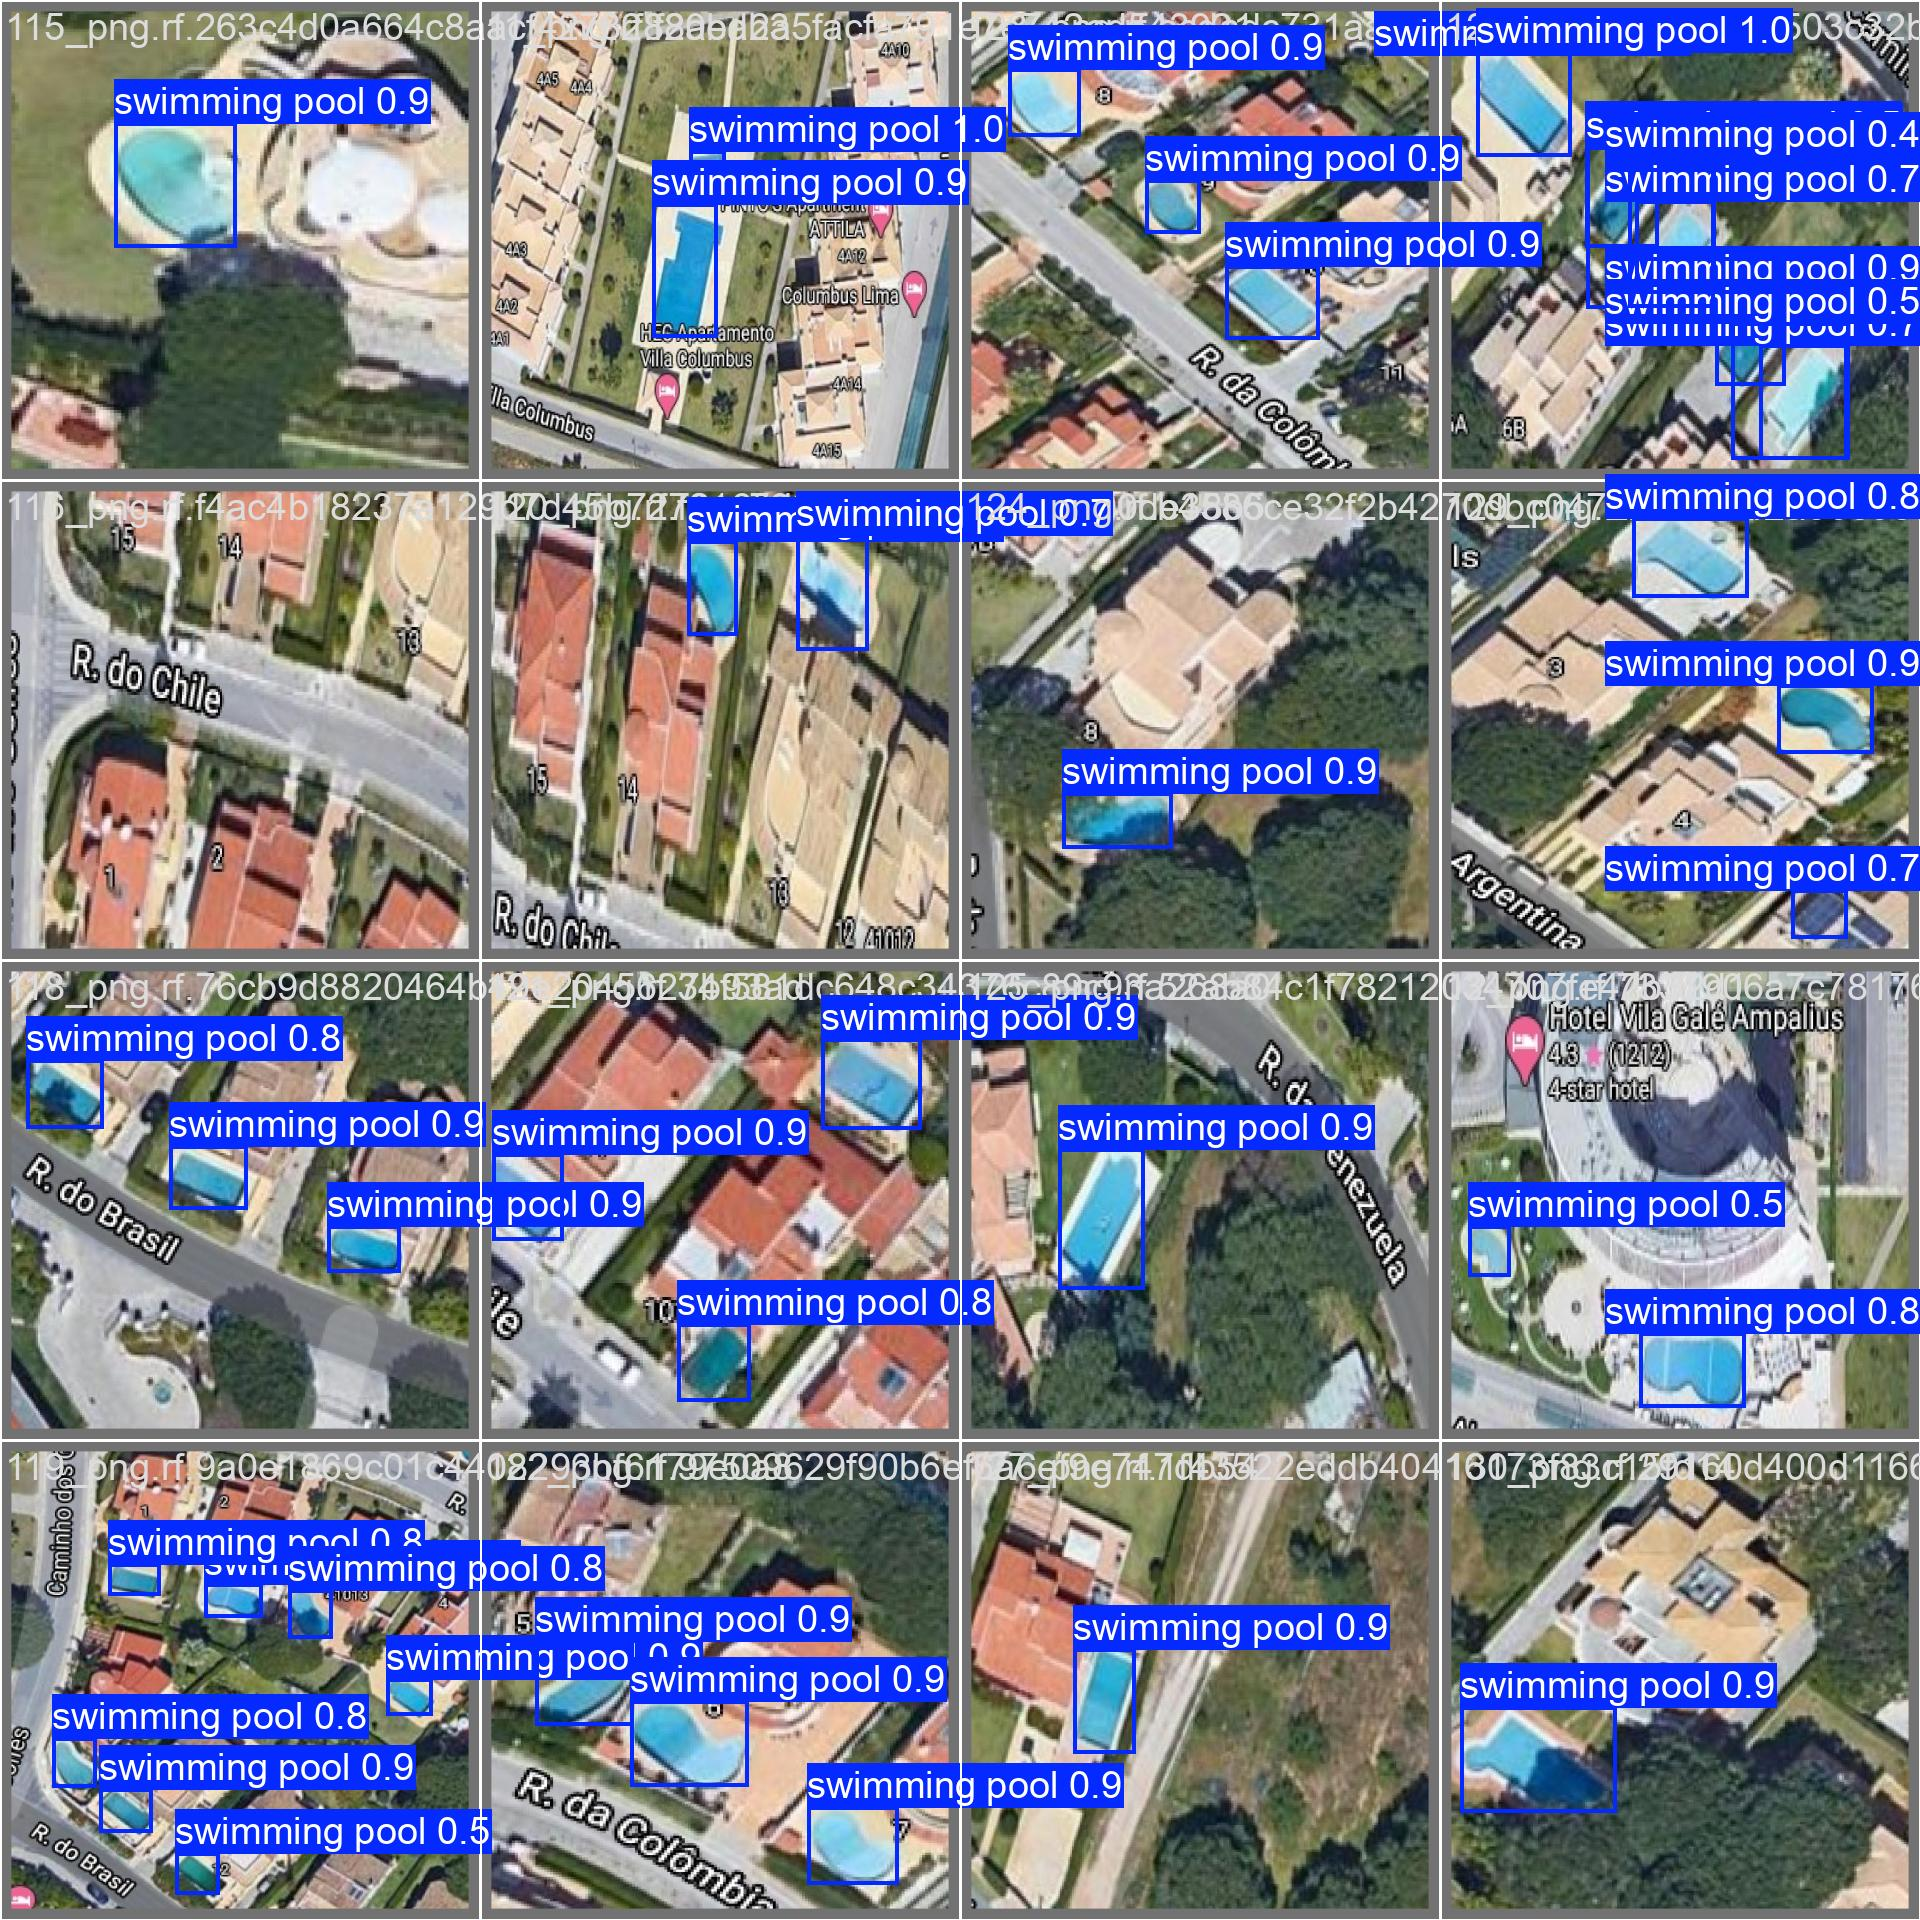

In [12]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'/content/runs/detect/val/val_batch1_pred.jpg', width=600)